## Import packages

In [31]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

## Import dataset

In [10]:
dataset = loadtxt("//Users//Michael//Desktop//pima-indians-diabetes.data.txt", delimiter=",")

## Sep target and predictors

In [13]:
X = dataset[:,0:8] # predictors
Y = dataset[:,8] #targer

In [17]:
X.shape
Y.shape

(768,)

## Split training and test sets

In [18]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

## Train xgBoost model on training data

In [20]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [21]:
print(model)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)


## Predict using xgBoost classifer on test set

In [26]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

## Check peformance of predictions

In [28]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.95%


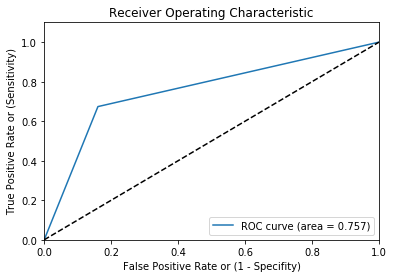

In [32]:
fpr, tpr, thresholds = roc_curve(y_test,predictions)
auc_test = roc_auc_score(y_test,predictions)

plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % auc_test)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [33]:
model.feature_importances_

array([ 0.07094595,  0.1858108 ,  0.08952703,  0.08445946,  0.07263514,
        0.16047297,  0.12837838,  0.20777027], dtype=float32)

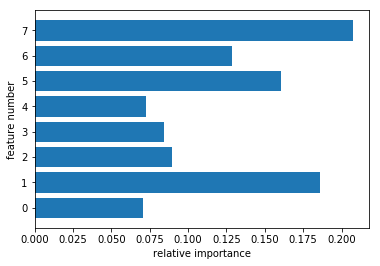

In [38]:
plt.barh(width=model.feature_importances_,bottom =[i for i in range(0,len(model.feature_importances_))])
plt.ylabel("feature number")
plt.xlabel("relative importance")
plt.show()